In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install filterpy

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman import JulierSigmaPoints


99.9252811105819


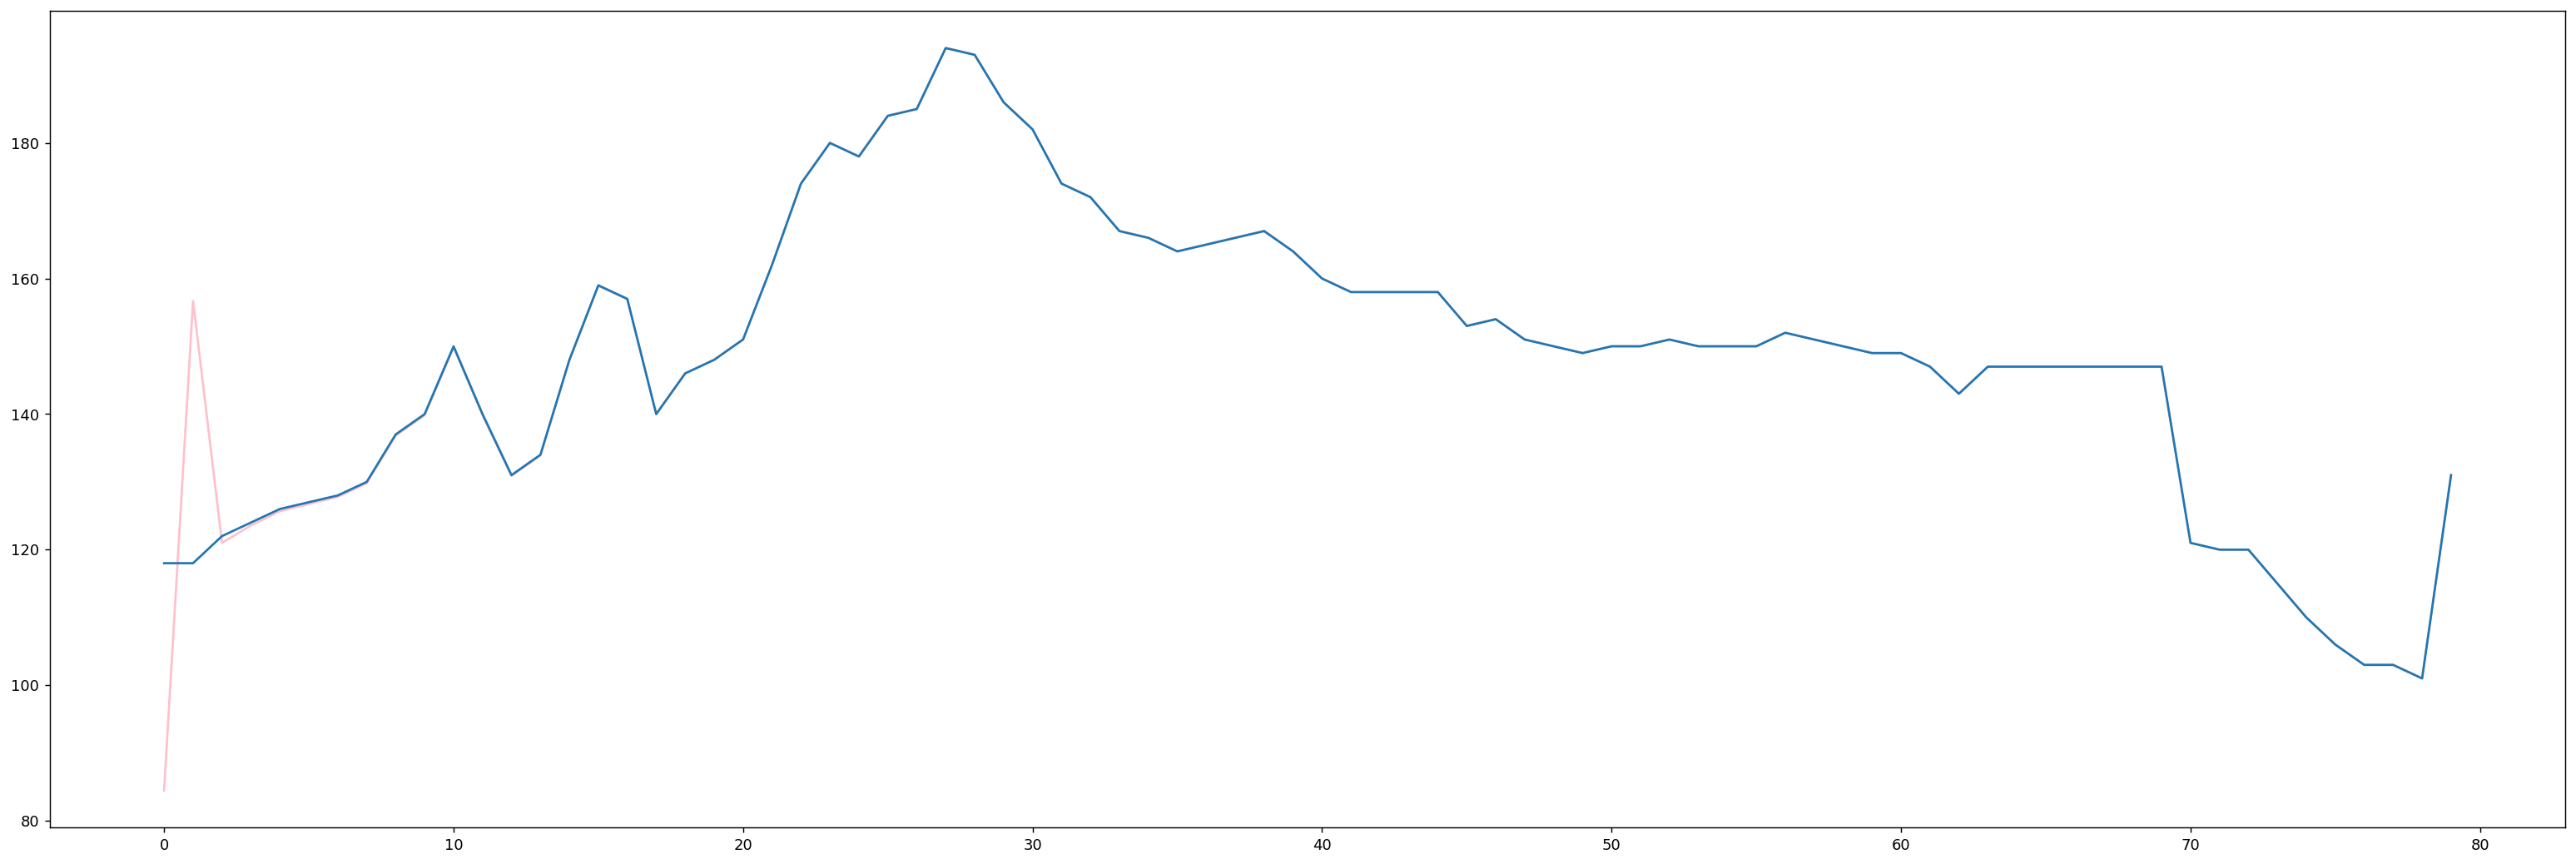

In [13]:
raw_data =  pd.read_csv("DanishFinalData.csv")

j_sigma_points = JulierSigmaPoints(n=5, kappa=1)
def A_hoo(xinput):
    return xinput[:1] 

def A_foo(y, dt):
    y[0] = y[0] - (10 * y[1] * y[0]) + (10 * y[2])
    y[1] = y[1] + 10 
    y[2] =  (2 * (y[2])/np.exp(0.1/y[4])) - (y[3]/ (np.exp(0.1/y[4]))**2) 
    y[4] = y[4] + 10 
    return y
A_ukf = UnscentedKalmanFilter(dim_x=5, dim_z=1, dt=100., hx=A_hoo, fx=A_foo, points=j_sigma_points)
A_ukf.P *= 1000
A_ukf.R *= 10e8
A_ukf.Q = np.array([[10e-6,0,0,0,0],[0,10e-3,0,0,0],[0,0,10e-3,0,0],[0,0,0,10e-2,0],[0,0,0,0,10e-1]])
A_ukf.x = [118, 0.068,0,0,20]

A_yss, A_xss = [], []
for i in range(len(raw_data)):
    temp = raw_data.iloc[i,1].astype(int)
    A_ukf.predict()
    A_ukf.update(temp)
    A_yss.append(temp)
    A_xss.append(A_ukf.x[0])
error = 0
for x in range(len(A_yss)):
    error += (A_yss[x] - A_xss[x])**2
print(100-(error/len(A_yss)))
plt.figure(num=None, figsize=(30, 10), dpi=130)
plt.plot(A_xss[0:80],color='pink')
plt.plot(A_yss[0:80]);



